In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier


In [2]:
df=pd.read_csv('C://Users//Ishoo//Desktop//codsoft//t1//tested.csv')
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Cleaning the data


In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
df.shape

(418, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Some of the age values are missing

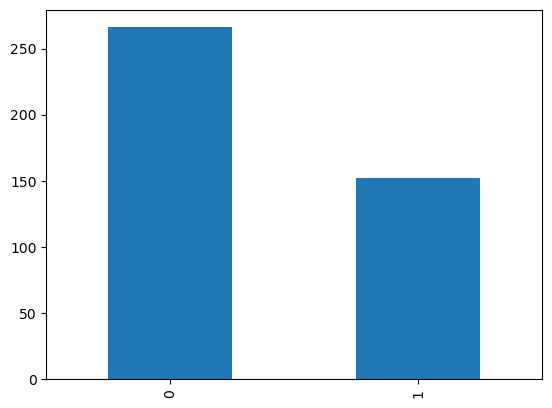

In [7]:
df["Survived"].value_counts().plot(kind="bar")
plt.show()

Number of survived passengers are less than the passengers who died

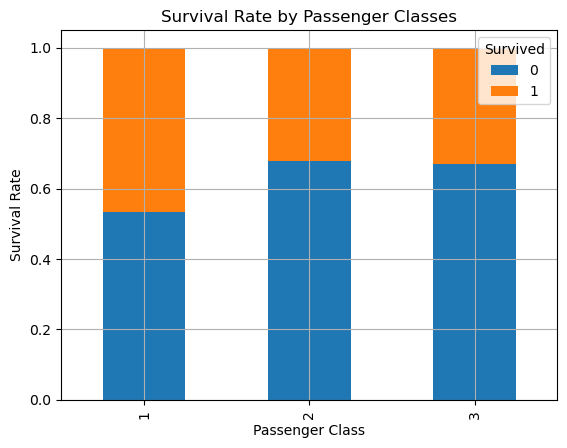

In [8]:
rel_1=pd.crosstab(df['Pclass'],df['Survived'])
rel_1_normalize = rel_1.div(rel_1.sum(1).astype(float), axis=0)
rel_1_normalize.plot(kind='bar',title='Survival Rate by Passenger Classes',stacked=True,grid=True)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

The most number of survived passengers are from the passenger class one
the most number of not survived passengers are from the passenger class two and three

<Axes: title={'center': 'Survival Rate by Passenger Classes'}, xlabel='Pclass'>

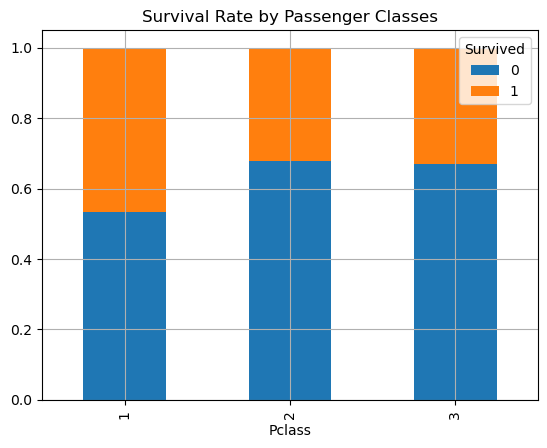

In [9]:
pd.crosstab(df.Pclass,df.Survived).apply(lambda r:r/r.sum(),axis=1).plot(kind='bar',title='Survival Rate by Passenger Classes',stacked=True,grid=True)

The most number of survived passengers are from the passenger class one the most number of not survived passengers are from the passenger class two and three

<Axes: title={'center': 'Survival Rate by Sex'}, xlabel='Sex'>

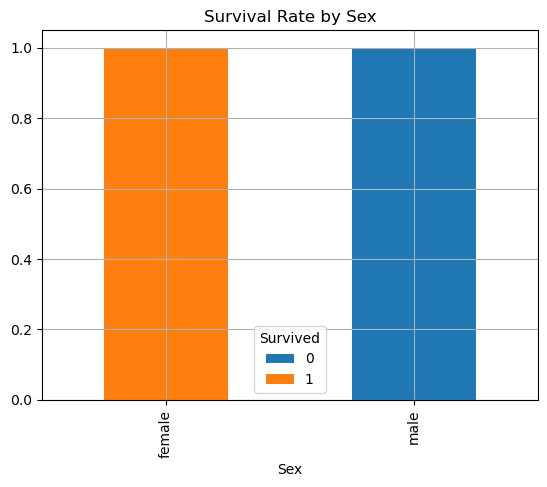

In [10]:
pd.crosstab(df.Sex,df.Survived).apply(lambda r:r/r.sum(),axis=1).plot(kind='bar',title='Survival Rate by Sex',stacked=True,grid=True)

the all the female passengers are survived and the male passengers didnt survive.

In [11]:
pd.crosstab(df.Sex,df.Survived)

Survived,0,1
Sex,,
female,0,152
male,266,0


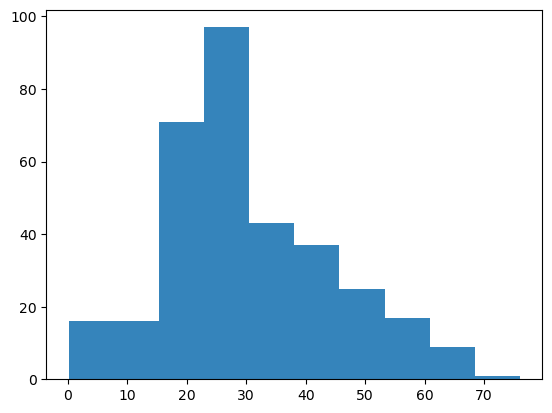

In [12]:
plt.hist(df["Age"],alpha=0.90)
plt.show()

In [13]:
df["Age"].isnull().sum()

86

<Axes: title={'center': 'Survival Rate by Embarked'}, xlabel='Embarked'>

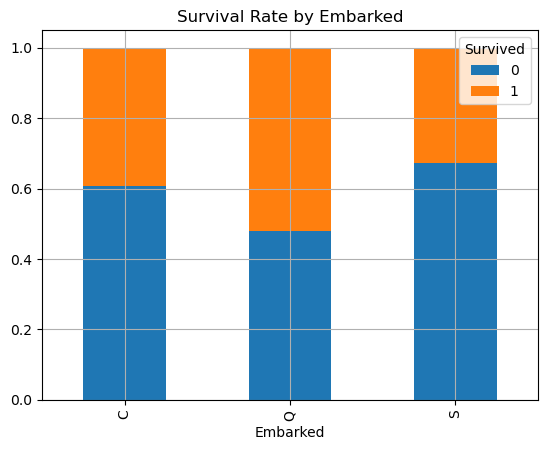

In [14]:
pd.crosstab(df.Embarked,df.Survived).apply(lambda r:r/r.sum(),axis=1).plot(kind='bar',title='Survival Rate by Embarked',stacked=True,grid=True)

the most survived people are from queenstown embarkation

In [15]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [16]:
df['Age_new'] = df['Age']
df['Age_new'].fillna((df['Age_new'].mean()), inplace=True)


Fill the missing age values with mean 

In [17]:
df['Age_new'].isnull().sum()

0

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0


In [19]:
df_one = pd.get_dummies(df["Sex"])

convert categorical data

In [20]:
df_one

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [21]:
df_one.drop(["female"],axis=1)

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [22]:
df=pd.concat((df_one, df), axis=1)

In [23]:
df.head()

,female,male,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new
0,0,1,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5
1,1,0,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0
2,0,1,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0
3,0,1,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0
4,1,0,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0


In [24]:
df.drop(["female"],axis=1,inplace=True)

In [25]:
e={'C':0, 'Q':1 ,'S':2}
df['Embarked']=df['Embarked'].apply(lambda x:e[x])
df['Embarked'].head()

0    1
1    2
2    1
3    2
4    2
Name: Embarked, dtype: int64

In [26]:
df.head()

,male,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new
0,1,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,1,34.5
1,0,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,2,47.0
2,1,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,1,62.0
3,1,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,2,27.0
4,0,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,2,22.0


In [27]:

df.drop(['PassengerId','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin'], axis=1, inplace=True)

drop least important factors for survival

In [28]:
df.rename(columns={"male": "Sex"},inplace=True)

In [29]:
df.rename(columns={"Age_new": "Age"},inplace=True)

In [30]:
df.head()

,Sex,Survived,Pclass,Embarked,Age
0,1,0,3,1,34.5
1,0,1,3,2,47.0
2,1,0,2,1,62.0
3,1,0,3,2,27.0
4,0,1,3,2,22.0


In [31]:
df = df[['Sex','Pclass','Embarked','Age','Survived']]

In [32]:
df.head()

,Sex,Pclass,Embarked,Age,Survived
0,1,3,1,34.5,0
1,0,3,2,47.0,1
2,1,2,1,62.0,0
3,1,3,2,27.0,0
4,0,3,2,22.0,1


Preprocessing

In [33]:
X=df.iloc[:,:4]
X


,Sex,Pclass,Embarked
0,1,3,1
1,0,3,2
2,1,2,1
3,1,3,2
4,0,3,2
...,...,...,...
413,1,3,2
414,0,1,0
415,1,3,2
416,1,3,2


In [38]:
y=df['Survived']
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Training the models,model prediction

MODEL SVC

In [40]:
svcmodel = SVC()
svcmodel.fit(x_train,y_train)
y_predict1 = svcmodel.predict(x_test)
print ("Accuracy of SVC  = %.2f" % (accuracy_score(y_test, y_predict1)))

Accuracy of SVC  = 1.00


MODEL LOGISTIC REGRESSION

In [41]:
logisticreg_model = LogisticRegression()
logisticreg_model.fit(x_train,y_train)
y_predict2 = logisticreg_model.predict(x_test)
print ("Accuracy of Regression= %.2f" % (accuracy_score(y_test, y_predict2)))

Accuracy of Regression= 1.00


MODEL RANDOM FOREST

In [42]:
RandomForest_model = RandomForestClassifier(n_estimators=100)
RandomForest_model.fit(x_train,y_train)
y_predict3 = RandomForest_model.predict(x_test)
print ("Accuracy of RandomForest= %.2f" % (accuracy_score(y_test, y_predict3)))

Accuracy of RandomForest= 1.00


MODEL GRADIENT DESCENT

In [43]:
gradientdescent_model = SGDClassifier()
gradientdescent_model.fit(x_train,y_train)
y_predict4 = gradientdescent_model.predict(x_test)
print ("Accuracy of Gradient Descent = %.2f" % (accuracy_score(y_test, y_predict4)))

Accuracy of Gradient Descent = 1.00


MODEL KNEIGHBORS

In [44]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(x_train,y_train)
y_predict5 = knn_model.predict(x_test)
print ("Accuracy of KNN= %.2f" % (accuracy_score(y_test, y_predict5)))

Accuracy of KNN= 1.00


the the random forest, logistic regression, gradient descent models perfectly suits for the survival prediction of titanic.
